In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [115]:
df = pd.read_csv("go_track_tracks.csv")
df.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [116]:
df = df.drop(["linha", "car_or_bus","rating_weather", "rating_bus","rating","time"], axis = 1)
df.head()

,id,id_android,speed,distance
0,1,0,19.210586,2.652
1,2,0,30.848229,5.290
2,3,1,13.560101,0.918
3,4,1,19.766679,7.700
4,8,0,25.807401,3.995


In [117]:
df_x = df.iloc[:, 2:4]
df_x.head()

,speed,distance
0,19.210586,2.652
1,30.848229,5.290
2,13.560101,0.918
3,19.766679,7.700
4,25.807401,3.995


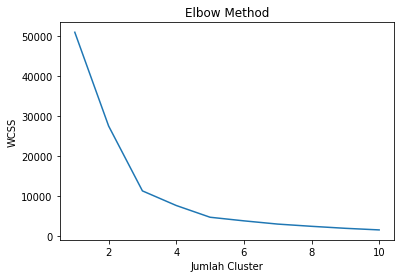

In [118]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [0]:
k = 3
centroids = {
    i+1 : [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}

<function matplotlib.pyplot.show>

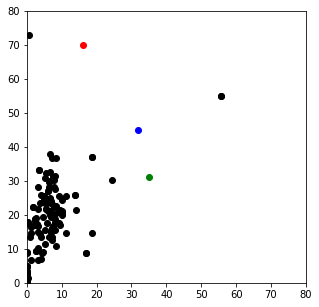

In [0]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['distance'], df['speed'], color = 'k')
colmap = {1: 'r' , 2: 'g' , 3: 'b'}
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show

   id  id_android      speed  ...  distance_from_3  closest  color
0   1           0  19.210586  ...        39.069157        2      g
1   2           0  30.848229  ...        30.227417        2      g
2   3           1  13.560101  ...        44.210383        2      g
3   4           1  19.766679  ...        35.031564        2      g
4   8           0  25.807401  ...        33.950492        2      g

[5 rows x 9 columns]


<function matplotlib.pyplot.show>

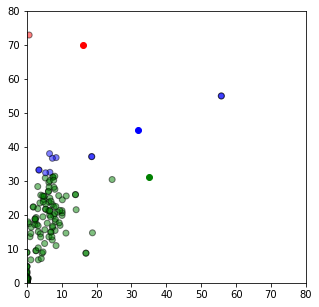

In [0]:
def assigment(df, centroids):
    for i in centroids.keys() :
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['distance'] - centroids[i][0]) ** 2
                + (df['speed'] - centroids[i][1]) ** 2
            )
        )
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis = 1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])

    return df

df = assigment(df,centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['distance'], df['speed'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show

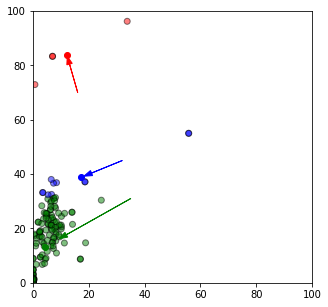

In [0]:
import copy

old_centroids = copy.deepcopy(centroids)
def update(k) :
    for i in centroids.keys() :
        centroids[i][0] = np.mean(df[df['closest'] == i ]['distance'])
        centroids[i][1] = np.mean(df[df['closest'] == i ]['speed'])
    
    return k

centroids = update(centroids)

fig = plt.figure(figsize = (5,5))

ax = plt.axes()
plt.scatter(df['distance'], df['speed'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,100)
plt.ylim(0,100)

for i in old_centroids.keys() :
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75

    ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length = 3, fc=colmap[i], ec = colmap[i])

plt.show()

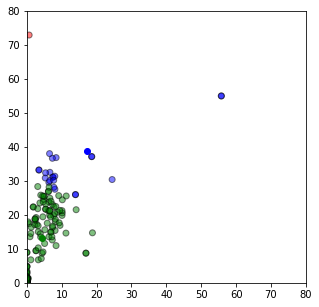

In [0]:
df = assigment(df,centroids)

fig = plt.figure(figsize = (5,5))
plt.scatter(df['distance'], df['speed'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

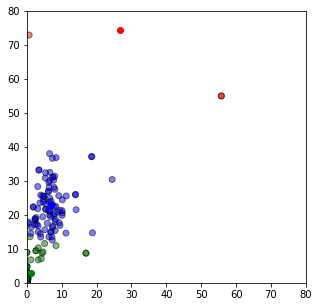

In [0]:
while True :
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assigment(df,centroids)

    if closest_centroids.equals(df['closest']) :
        break

fig = plt.figure(figsize = (5,5))
plt.scatter(df['distance'], df['speed'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show()